In [1]:
# Esto es solo para poder debugear.
#!pip install torch tqdm
import torch
import numpy as np
import tqdm

# Genera una semilla fija para que los experimentos sea repetibles.
t_cg = torch.manual_seed(1547)

### NUMPY

In [2]:
x = np.array([[1, 2,3, 4]],dtype = np.float32)
y = np.array([2, 4,6,8], dtype = np.float32)

def forward(x):
  return x * w
def loss(y_pred, y):
  return np.mean(((y_pred - y)**2))

def grad(y_pred,y):
  return (x* 2 * ((y_pred) - y)).mean()

In [3]:
w= 0.0
lr =0.05
for e in range(10):
  y_pred = forward(x)
  loss_i = loss(y_pred,y)
  grad_i = grad(y_pred,y)
  w -= lr*grad_i
  print(loss_i, w)

print(forward(x = 5))


30.0 1.5
1.875 1.875
0.1171875 1.96875
0.0073242188 1.9921875
0.00045776367 1.998046875
2.861023e-05 1.99951171875
1.7881393e-06 1.9998779296875
1.1175871e-07 1.999969482421875
6.9849193e-09 1.9999923706054688
4.3655746e-10 1.9999980926513672
9.999990463256836


### TORCH METHOD 1

In [4]:
x = torch.tensor([1,2,3, 4],dtype = torch.float32, requires_grad = False)
y = torch.tensor([2,4,6,8], dtype = torch.float32, requires_grad = False)
w = torch.tensor(0.0,dtype = torch.float32, requires_grad = True)


def forward(x):
  return w *  x
def loss(y_pred, y):
  return ((y_pred - y)**2).mean()


In [5]:
lr =0.01
for e in tqdm.tqdm(range(50)):
  y_pred = forward(x)
  l  = loss(y_pred, y)
  l.backward()

  with torch.no_grad():
    w -= lr * w.grad
  w.grad.zero_()

  if e % 10 == 0:
    print(f"epoch : {e}")
    print(f"loss : {l.item():.3f}")
    print(f"w : {w.item():.3f}")

print(forward(x = 5).item())

100%|██████████| 50/50 [00:00<00:00, 1786.12it/s]

epoch : 0
loss : 30.000
w : 0.300
epoch : 10
loss : 1.163
w : 1.665
epoch : 20
loss : 0.045
w : 1.934
epoch : 30
loss : 0.002
w : 1.987
epoch : 40
loss : 0.000
w : 1.997
9.997042655944824


### TORCH METHOD 2

In [6]:
import torch.nn as nn
x = torch.tensor([1,2,3, 4],dtype = torch.float32, requires_grad = False)
y = torch.tensor([2,4,6,8], dtype = torch.float32, requires_grad = False)
w = torch.tensor(0.0,dtype = torch.float32, requires_grad = True)

#otra forma seria : instanciar clase que devuelve objeto MSEloss
# loss = nn.MSELoss(size_average=None, reduce=None, reduction='mean')

def forward(x):
  return x * w


In [7]:
lr =0.01
for e in tqdm.tqdm(range(50)):
  y_pred = forward(x)
  # simula la funcion de loss implementada a mano antes

  # Metodo 1: instanciando clase de error
  # l = loss(input = y_pred, target = y)

  # Metodo 2 : simulan la funcion de loss implementada a mano antes mediante una funcion de error built in de torch:
  l  = nn.functional.mse_loss(input = y_pred, target = y, size_average=None, reduce=None, reduction='mean')
  l.backward()

  with torch.no_grad():
    w -= lr * w.grad
  w.grad.zero_()

  if e % 10 == 0:
    print(f"epoch : {e}")
    print(f"loss : {l.item():.3f}")
    print(f"w : {w.item():.3f}")

print(forward(x = 5).item())

100%|██████████| 50/50 [00:00<00:00, 3845.37it/s]

epoch : 0
loss : 30.000
w : 0.300
epoch : 10
loss : 1.163
w : 1.665
epoch : 20
loss : 0.045
w : 1.934
epoch : 30
loss : 0.002
w : 1.987
epoch : 40
loss : 0.000
w : 1.997
9.997042655944824


### TORCH METHOD 3

In [8]:
import torch.nn as nn

x = torch.tensor([1,2,3, 4],dtype = torch.float32, requires_grad = False)
y = torch.tensor([2,4,6,8], dtype = torch.float32, requires_grad = False)
w = torch.tensor(0.0,dtype = torch.float32, requires_grad = True)

# loss class
loss = nn.MSELoss(size_average=None, reduce=None, reduction='mean')

# crea optimizer para prescendir d actualizacion de pesos a mano
optimizer = torch.optim.SGD(params = [w], lr=0.01)

def forward(x):
  return x * w


In [9]:
for epoch in tqdm.tqdm(range(50)):
  # forward
  y_pred = forward(x)

  # compute loss for all the batch
  l   = loss(input = y_pred, target = y)

  # compute the gradients for each w_i : dloss/dw_i (usa grafo computacional y almacena ,en el tensor .grad asociado a cada parametro, el valor del gradiente que luego usa el algoritmo de optimizacion)
  l.backward()

  # paso del optimizer (en este caso un simple SGD) equivale a lo que haciamos a mano de w += -lr*w.grad
  optimizer.step()

  if epoch % 10 == 0:
    print(f"epoch : {epoch}")
    print(f"loss : {l.item():.3f}")
    print(f"w : {w.item():.3f}")
  optimizer.zero_grad()

print(forward(x = 5).item())

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:00<00:00, 543.47it/s]

epoch : 0
loss : 30.000
w : 0.300
epoch : 10
loss : 1.163
w : 1.665
epoch : 20
loss : 0.045
w : 1.934
epoch : 30
loss : 0.002
w : 1.987
epoch : 40
loss : 0.000
w : 1.997
9.997042655944824


### TORCH METHOD 4

In [64]:
import torch.nn as nn

x = torch.tensor([[1],[2],[3], [4]],dtype = torch.float32, requires_grad = False)
y = torch.tensor([[2],[4],[6],[8]], dtype = torch.float32, requires_grad = False)

# Dimension layers (in and out, entra 4 samples (batch) sale 1 output por cada input) teniendo en cuenta el batch: X_input(1,4) * W(4,1)--> (1,1) // sin batch : X_input(1) * W(1)--> (1)
batch_size , features  = x.shape
# features == dim_input y en este caso features ==  dim_output pq capa solo 1 parametro (como que solo una neurona)

# model [capa lineal inicializa un tensor paramters asociado a la capa en funcion de las input y output dimesnions especificadas ]: capa lineal con 1 W y 1 X input (escalares) ; luego dim_input = 1 y dim_output = 1
model = nn.Linear(in_features= 1, out_features = 1)

# loss class
loss = nn.MSELoss(size_average=None, reduce=None, reduction='mean')

# crea optimizer para prescendir de actualizacion de pesos a mano
optimizer = torch.optim.SGD(params = model.parameters(), lr=0.01)

def forward(x):
  return x * w


In [65]:
for epoch in tqdm.tqdm(range(50)):
  # forward now is == to calling the model
  y_pred = model(x)

  # compute loss for all the batch
  l   = loss(input = y_pred, target = y)

  # compute the gradients for each w_i : dloss/dw_i (usa grafo computacional y almacena ,en el tensor .grad asociado a cada parametro, el valor del gradiente que luego usa el algoritmo de optimizacion)
  l.backward()

  # paso del optimizer (en este caso un simple SGD) equivale a lo que haciamos a mano de w += -lr*w.grad
  optimizer.step()

  if epoch % 10 == 0:
    print(f"epoch : {epoch}")
    print(f"loss : {l.item():.3f}")
  optimizer.zero_grad()

print(forward(x = 5).item())

  0%|          | 0/50 [00:00<?, ?it/s]

epoch : 0
loss : 21.203


AttributeError: 'Linear' object has no attribute 'get_parameters'

### TORCH METHOD 5  : custom module + dataset

In [143]:
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# data samples
x_numpy , y_numpy = datasets.make_regression(n_samples =100, n_features= 1, noise =20, random_state = 1)
x_numpy_std  = (x_numpy - np.mean(x_numpy)) / np.std(x_numpy)
y_numpy_std = (y_numpy - np.mean(y_numpy)) / np.std(y_numpy)
print(x_numpy.shape, y_numpy.shape)
print(x_numpy_std.shape, y_numpy_std.shape)

# to torch tensor
x = torch.from_numpy(x_numpy_std.astype(np.float32))
y = torch.from_numpy(y_numpy_std.astype(np.float32))
print(x.shape, y.shape)
# reshape y from (100) tensor -> (100,1) tensor
y = y.view(y.shape[0],1)
print(x.shape, y.shape)
print(f"Media de target y : {y.mean(dim = 0).item():.3f}")
print(f"Media de target y std: {y.mean(dim = 0).item():.3f}")

# numbeer of samples and number of features
# x (100,1)
n_samples = x.shape[0]
features = x.shape[1]

# custom class model (linear regression layer)
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size) -> None:
       super().__init__()
       self.in_size = input_size
       self.out_size = output_size
       # model [capa lineal inicializa un tensor paramters asociado a la capa en funcion de las input y output dimesnions especificadas ]: capa lineal con 1 W y 1 X input (escalares) ; luego dim_input = 1 y dim_output = 1
       self.linear = nn.Linear(in_features= self.in_size, out_features = self.out_size, bias = True)
    def forward(self,x):
        return self.linear(x)
    

# instanciar capa y crear modelo
model = LinearRegression(input_size = features, output_size = features)
# loss class
loss = nn.MSELoss(reduction='mean')
# crea optimizer para prescendir de actualizacion de pesos a mano
optimizer = torch.optim.SGD(params = model.parameters(), lr=0.01)

# MODULE CLASS DOCU:
"""nn.Module :
Base class for all neural network modules.

Your models should also subclass this class.

Modules can also contain other Modules, allowing to nest them in a tree structure. You can assign the submodules as regular attributes: 
self.sub_module = nn.Linear(...)"""

# Iterate along all de modules inside a network class or model class. Notice that LinearRegression module has inside a linear layer "module" or only linear layer
# note that the atribute name : self.linear will define the string "linear" to refer to that layer inside a module
# this will be useful when ,inside a class module, there are several layers
print("\n")

for m in model.modules():
    print(f"\nModule : {m}")

# iterate along all the parameters inside a module ( a module can have a lot of layers with their parameters)
for p in model.named_parameters(prefix='', recurse=True, remove_duplicate=True):
    print(f"\nParameter : {p}")

(100, 1) (100,)
(100, 1) (100,)
torch.Size([100, 1]) torch.Size([100])
torch.Size([100, 1]) torch.Size([100, 1])
Media de target y : -0.000
Media de target y std: -0.000



Module : LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

Module : Linear(in_features=1, out_features=1, bias=True)

Parameter : ('linear.weight', Parameter containing:
tensor([[0.9165]], requires_grad=True))

Parameter : ('linear.bias', Parameter containing:
tensor([-0.5463], requires_grad=True))


100%|██████████| 50/50 [00:00<00:00, 1515.34it/s]

epoch : 0
loss : 0.360
w : 0.918
Predictions :tensor([[4.5543],
        [5.5050]])


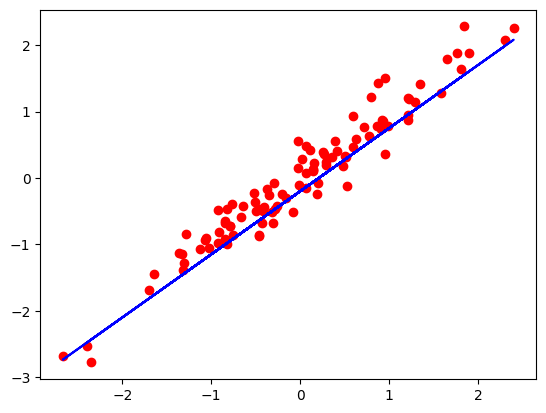

In [144]:
epochs = 50
for epoch in tqdm.tqdm(range(epochs)):
    
  # forward now is == to calling the model
  y_pred = model(x)

  # compute loss for all the batch
  l   = loss(input = y_pred, target = y)

  # compute the gradients for each w_i : dloss/dw_i (usa grafo computacional y almacena ,en el tensor .grad asociado a cada parametro, el valor del gradiente que luego usa el algoritmo de optimizacion)
  l.backward()

  # paso del optimizer (en este caso un simple SGD) equivale a lo que haciamos a mano de w += -lr*w.grad
  optimizer.step()
  
  # restore or eliminate the grads inside parameter.grad tensor for next iteration
  optimizer.zero_grad()

  if epoch % 50 == 0:
    print(f"epoch : {epoch}")
    print(f"loss : {l.item():.3f}")
    print(f"w : {model.get_parameter(target = 'linear.weight').item():.3f}")

# try prediction 
# IMPORTANT TO DETACH 
prediction = model(x = torch.tensor([[5],[6]], dtype = torch.float32)).detach()
print(f"Predictions :{prediction}")

# plotting
y_pred_train = model(x = x).detach().numpy()
plt.plot(x_numpy_std, y_numpy_std, 'ro')
#plt.plot(x_numpy, y_numpy, 'yo')
plt.plot(x_numpy_std, y_pred_train, 'b')
plt.show()


### TORCH METHOD 6  : FFN 

In [147]:
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

# device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyperparameters 
input_size = 784 # 28x28 images
hidden_size = 100
num_clases = 10
num_epochs = 2
batch_size = 100
lr = 0.001

# MNIST
train_set = torchvision.datasets.MNIST(root = './data', train = True, transform =transforms.ToTensor() , download = True)
test_set = torchvision.datasets.MNIST(root = './data', train = False, transform =transforms.ToTensor() , download = True)

# MNIST dataloaders
train_loader = torch.utils.data.DataLoader(dataset = train_set, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_set, batch_size = batch_size, shuffle = False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:03<00:00, 2618149.49it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 262009.05it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 1871203.49it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [167]:
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# data samples shape

# custom class model (linear regression layer)
class NeuralNet(nn.Module):
    def __init__(self, input_size,hidden_size, num_classes) -> None:
       super().__init__()
       self.in_size = input_size
       self.hidden = hidden_size
       self.num_classes = num_classes
       
       # Arquitecture of FFN
       self.l_1 = nn.Linear(in_features= self.in_size, out_features = self.hidden, bias = True)
       self.Relu = nn.ReLU()
       self.l_2 = nn.Linear(in_features=  self.hidden, out_features = self.num_classes, bias = True)
       
    def forward(self,x):
        return self.l_2(self.Relu(self.l_1(x)))
    

# instanciar capa y crear modelo
model = NeuralNet(input_size =input_size ,hidden_size = hidden_size, num_classes = num_clases)
# loss class
loss = nn.CrossEntropyLoss()
# crea optimizer para prescendir de actualizacion de pesos a mano
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08)

# MODULE CLASS DOCU:
"""nn.Module :
Base class for all neural network modules.

Your models should also subclass this class.

Modules can also contain other Modules, allowing to nest them in a tree structure. You can assign the submodules as regular attributes: 
self.sub_module = nn.Linear(...)"""

# Iterate along all de modules inside a network class or model class. Notice that LinearRegression module has inside a linear layer "module" or only linear layer
# note that the atribute name : self.linear will define the string "linear" to refer to that layer inside a module
# this will be useful when ,inside a class module, there are several layers
print("\n")

for m in model.modules():
    print(f"\nModule : {m}")

# iterate along all the parameters inside a module ( a module can have a lot of layers with their parameters)
for p in model.named_parameters(prefix='', recurse=True, remove_duplicate=True):
    print(f"\nParameter : {p}")




Module : NeuralNet(
  (l_1): Linear(in_features=784, out_features=100, bias=True)
  (Relu): ReLU()
  (l_2): Linear(in_features=100, out_features=10, bias=True)
)

Module : Linear(in_features=784, out_features=100, bias=True)

Module : ReLU()

Module : Linear(in_features=100, out_features=10, bias=True)

Parameter : ('l_1.weight', Parameter containing:
tensor([[-1.9008e-02, -8.3813e-03, -1.6468e-02,  ...,  2.9265e-02,
          2.7495e-02, -3.1858e-02],
        [-3.2442e-02,  3.4523e-02, -3.5707e-02,  ...,  3.3565e-02,
          2.4717e-02,  1.5751e-02],
        [ 9.4932e-03,  3.4715e-02,  8.6638e-03,  ...,  3.9738e-04,
          1.2902e-02,  1.3167e-02],
        ...,
        [ 3.1463e-02, -3.8930e-04,  6.5913e-04,  ...,  8.4984e-03,
          2.6184e-02,  1.4366e-02],
        [ 1.9162e-02, -1.4891e-02, -2.3189e-02,  ...,  1.1005e-02,
         -1.9193e-02, -1.2443e-02],
        [-2.7918e-02,  2.5634e-02,  1.9917e-02,  ...,  3.2149e-06,
          6.2249e-03, -2.0274e-02]], requires_gr

In [168]:
epochs = 10
for epoch in tqdm.tqdm(range(epochs)):
  for i ,(b_samples ,b_labels) in enumerate(train_loader):
    # (100,1,28,28) -> (100, 28*28)
    b_samples = b_samples.view(100,28*28).to(device)
    #print(b_samples.shape)
    # (100) -> (100,1)
    b_labels = b_labels.to(device)
    
    # forward now is == to calling the model
    
    y_pred = model(b_samples)
    #print(y_pred.shape) # (100,10)

    # compute loss for all the batch
    l   = loss(input = y_pred, target = b_labels) # b_labels debe ser (100) pq crossentropyloss en torch solo necesita el indice de la label no el vector de dimendion 10 entero tipo one hot

    # compute the gradients for each w_i : dloss/dw_i (usa grafo computacional y almacena ,en el tensor .grad asociado a cada parametro, el valor del gradiente que luego usa el algoritmo de optimizacion)
    l.backward()

    # paso del optimizer (en este caso un simple SGD) equivale a lo que haciamos a mano de w += -lr*w.grad
    optimizer.step()
    
    # restore or eliminate the grads inside parameter.grad tensor for next iteration
    optimizer.zero_grad()

  print(f"epoch : {epoch}")
  print(f"loss : {l.item():.3f}")
  



  0%|          | 0/100 [00:00<?, ?it/s]

epoch : 0
loss : 2.295
epoch : 0
loss : 2.287
epoch : 0
loss : 2.208
epoch : 0
loss : 2.221
epoch : 0
loss : 2.134
epoch : 0
loss : 2.103
epoch : 0
loss : 2.036
epoch : 0
loss : 2.082
epoch : 0
loss : 2.036
epoch : 0
loss : 1.917
epoch : 0
loss : 1.916
epoch : 0
loss : 1.845
epoch : 0
loss : 1.770
epoch : 0
loss : 1.801
epoch : 0
loss : 1.774
epoch : 0
loss : 1.719
epoch : 0
loss : 1.661
epoch : 0
loss : 1.588
epoch : 0
loss : 1.451
epoch : 0
loss : 1.435
epoch : 0
loss : 1.516
epoch : 0
loss : 1.399
epoch : 0
loss : 1.421
epoch : 0
loss : 1.267
epoch : 0
loss : 1.267
epoch : 0
loss : 1.382
epoch : 0
loss : 1.239
epoch : 0
loss : 1.149
epoch : 0
loss : 1.234
epoch : 0
loss : 1.083
epoch : 0
loss : 1.029
epoch : 0
loss : 1.103
epoch : 0
loss : 1.036
epoch : 0
loss : 1.053
epoch : 0
loss : 0.963
epoch : 0
loss : 0.980
epoch : 0
loss : 0.926
epoch : 0
loss : 0.867
epoch : 0
loss : 0.787
epoch : 0
loss : 0.865
epoch : 0
loss : 0.875
epoch : 0
loss : 0.791
epoch : 0
loss : 0.797
epoch : 0
l

  1%|          | 1/100 [00:08<14:18,  8.67s/it]

epoch : 0
loss : 0.307
epoch : 0
loss : 0.263
epoch : 0
loss : 0.301
epoch : 0
loss : 0.256
epoch : 0
loss : 0.295
epoch : 0
loss : 0.332
epoch : 0
loss : 0.140
epoch : 0
loss : 0.336
epoch : 0
loss : 0.312
epoch : 0
loss : 0.374
epoch : 0
loss : 0.157
epoch : 0
loss : 0.173


  2%|▏         | 2/100 [00:20<16:57, 10.39s/it]


KeyboardInterrupt: 

In [6]:
x = torch.randn(2,2)
y = torch.randn(2,2)

print(x.shape)
print(x)
x_soft_max = x.softmax(dim = -1)


print(x_soft_max.shape)
print(x_soft_max.sum(dim = 1))
print(x_soft_max)



torch.Size([2, 2])
tensor([[-1.3433,  0.4192],
        [ 0.3304,  0.9006]])
torch.Size([2, 2])
tensor([1., 1.])
tensor([[0.1465, 0.8535],
        [0.3612, 0.6388]])


In [10]:
x = torch.randn(2,2)
y = torch.randn(2,2)
print(x)
print(y)

print(x * y )




tensor([[ 0.2425, -0.6660],
        [ 0.4344, -0.5432]])
tensor([[ 0.0457,  1.4203],
        [ 0.3156, -1.1674]])
tensor([[ 0.0111, -0.9460],
        [ 0.1371,  0.6342]])


In [11]:
print(x  @ y )

tensor([[-0.1991,  1.1219],
        [-0.1516,  1.2511]])


In [86]:
suma = 0
for e in x_soft_max[:,0]:
  print(e)
  suma += e
print(suma)

tensor(0.2999)
tensor(0.7001)
tensor(1.0000)


In [87]:
suma = 0
for e in x_soft_max[1,:]:
  print(e)
  suma += e
print(suma)

tensor(0.7001)
tensor(0.2779)
tensor(0.9779)


In [82]:
a = torch.randn(1, 2, 3, 4)
a.size()
print(a)
b = a.transpose(1, 2)  # Swaps 2nd and 3rd dimension
b.size()
print(b)
c = a.view(1, 3, 2, 4)  # Does not change tensor layout in memory
c.size()
torch.equal(b, c)

tensor([[[[ 0.5207, -1.2700,  0.9622, -1.4488],
          [-0.3503, -1.8362, -0.2652,  1.5133],
          [-0.5715, -1.1178, -0.0886, -0.9020]],

         [[-0.2685,  1.1808, -0.2541,  0.6832],
          [ 0.6094, -0.1029, -0.8680,  0.7459],
          [ 0.1279, -0.4754,  0.0697, -1.5372]]]])
tensor([[[[ 0.5207, -1.2700,  0.9622, -1.4488],
          [-0.2685,  1.1808, -0.2541,  0.6832]],

         [[-0.3503, -1.8362, -0.2652,  1.5133],
          [ 0.6094, -0.1029, -0.8680,  0.7459]],

         [[-0.5715, -1.1178, -0.0886, -0.9020],
          [ 0.1279, -0.4754,  0.0697, -1.5372]]]])


False

In [ ]:
# Red estilo pytorch
class FFNN(torch.nn.Module):
  def __init__(self, d0=300, d1=200, d2=300, d3 = 3):
    super(FFNN, self).__init__()

    # Definimos capas (automáticamente se registran como parametros)
    self.fc1 = torch.nn.Linear(d0, d1, bias=True)
    self.fc2 = torch.nn.Linear(d1, d2, bias=True)
    self.fc3 = torch.nn.Linear(d2,  d3, bias=True)

  # Computa la pasada hacia adelante
  def forward(self, x):

    u1 = self.fc1(x)
    h1 = torch.tanh(u1)
    u2 = self.fc2(h1)
    h2 = torch.sigmoid(u2)
    u3 = self.fc3(h2)
    _sft_max_last = torch.nn.Softmax(dim = 1)
    y_pred = _sft_max_last(u3)

    return y_pred

In [ ]:
from torch.utils.data import Dataset, DataLoader

class RandomDataSet(Dataset):
  def __init__(self, N, f, k):
    R_N_f = torch.rand(N,f)
    self.X = torch.bernoulli(R_N_f)
    R_N_1 = torch.rand(N,k)
    #self.Y = torch.bernoulli(R_N_1)
    _sftmax = torch.nn.Softmax(dim=1)
    self.Y  = _sftmax(R_N_1)
    self.num_features = f

  # Debemos definir __len__ para retornar el tamaño del dataset
  def __len__(self):
    return self.X.size()[0]

  # Debemos definir __getitem__ para retornar el i-ésimo
  # ejemplo en nuestro dataset.
  def __getitem__(self, i):
    return self.X[i], self.Y[i]

In [ ]:

def loop_FFNN(dataset, batch_size, d1, d2, d3, lr,
                 epochs, run_in_GPU=True, reports_every=1,
                 cheq_grad=False):

  # Define un tipo para los tensores según si correrá en la GPU o no
  device = 'cuda' if run_in_GPU else 'cpu'

  # d0 es la cantidad de features
  d0 = dataset.num_features

  # Crea la red
  red = FFNN(d0, d1, d2, d3)

  # Pasa la red al dispositivo elegido
  red.to(device)

  # Muestra la cantidad de parámetros
  print('Red:', red)

  # Crea un dataloader desde el dataset
  data = DataLoader(dataset, batch_size, shuffle=True)

  # Crea un optimizador para el descenso de gradiente
  optimizador = torch.optim.SGD(red.parameters(), lr)

  # Define una perdida
  #perdida = torch.nn.BCELoss()
  perdida = torch.nn.CrossEntropyLoss()

  # Comienza el entrenamiento
  tiempo_epochs = 0
  for e in range(1,epochs+1):
    inicio_epoch = time.time()

    for (x,y) in data:
      # Asegura de pasarlos a la GPU si fuera necesario
      x, y = x.to(device), y.to(device)

      # Computa la pasada hacia adelante (forward)
      y_pred = red.forward(x)

      # Computa la función de pérdida
      L = perdida(y_pred,y)

      # Computa los gradientes hacia atrás (backpropagation)
      L.backward()

      # Descenso de gradiente para actualizar los parámetros
      optimizador.step()

      # Limpia los gradientes
      optimizador.zero_grad()

    tiempo_epochs += time.time() - inicio_epoch

    if e % reports_every == 0:
      # Calcula la certeza de las predicciones sobre todo el conjunto
      X = dataset.X.to(device)
      Y = dataset.Y.to(device)

      # Predice usando la red
      Y_PRED = red.forward(X)

      # Calcula la pérdida de todo el conjunto
      L_total = perdida(Y_PRED, Y)

      # Elige una clase dependiendo del valor de Y_PRED
      Y_PRED_BIN = (Y_PRED >= 0.5).float()

      correctos = torch.sum(Y_PRED_BIN == Y).item()
      acc = (correctos / N) * 100

      sys.stdout.write(
            '\rEpoch:{0:03d}'.format(e) + ' Acc:{0:.2f}%'.format(acc)
            + ' Loss:{0:.4f}'.format(L_total)
            + ' Tiempo/epoch:{0:.3f}s'.format(tiempo_epochs/e))

In [ ]:
N = 50000 # numero de ejemplos
f = 300 # numero de features
k = 3 # numero de clases

dataset = RandomDataSet(N,f, k)

In [ ]:
epochs = 50
loop_FFNN(dataset, batch_size=100, d1=500, d2=100, d3 = 3, epochs=epochs,
             run_in_GPU=True, lr=0.08)

Red: FFNN(
  (fc1): Linear(in_features=300, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=5, bias=True)
)


RuntimeError: 0D or 1D target tensor expected, multi-target not supported